In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
T  = 10.0
Dt = 0.1


In [ ]:
# A and b
A = np.array([
    [1, 0, 0,   0,   0, 0, 0,   0],
    [0, 1, 0,   0,   0, 0, 0,   0],
    [0, 0, 0,   0,   1, 0, 0,   0],
    [0, 0, 0,   0,   0, 1, 0,   0],
    [1,   T,   T*T,   T**3,   0, 0, 0,   0],
    [0, 1, 2*T, 3*T*T, 0, 0, 0,   0],
    [0, 0, 0,   0,   1,   T,   T*T,   T**3],
    [0, 0, 0,   0,   0, 1, 2*T, 3*T*T]
], dtype=float)


B = np.array([
    1,
    1,
   -5,
    1,
    5,
    1,
    5,
   -3
], dtype=float)

In [ ]:

X = np.linalg.pinv(A) @ B
a1i = X[0:4].copy()
a2i  =X[4:8].copy()

t = np.arange(0, T + Dt, Dt)
N = t.size

x1 = np.zeros(N)
x2 = np.zeros(N)
x3 = np.zeros(N)
u1 = np.zeros(N)
u2 = np.zeros(N)

In [ ]:
# main loop
eps = 1e-8
for i in range(N):  # looop will run fro all the time in the time arry
    ti = t[i]

    # z1 part
    a10, a11, a12, a13 = a1i
    z1   = a10 + a11*ti + a12*(ti*ti) + a13*(ti*ti*ti)
    z1d  = a11 + 2.0*a12*ti + 3.0*a13*(ti**2)
    z1dd =      2.0*a12     + 6.0*a13*ti

    # z2 part
    a20, a21, a22, a23 = a2i
    z2   = a20 + a21*ti + a22*(ti*ti) + a23*(ti*ti*ti)
    z2d  = a21 + 2.0*a22*ti + 3.0*a23*(ti*ti)
    z2dd =      2.0*a22     + 6.0*a23*ti

    # states and controls
    x1[i] = z1
    x3[i] = z2
    u1[i] = z1d

    # avoid division by zero
    # For x2[i]
    if abs(z1d) > 1e-8:
        x2[i] = z2d / z1d
    else:
        x2[i] = z2d / 1e-8

    # For u2[i]
    if abs(z1d) > 1e-8:
        x2dd = z2dd * z1d - z2d * z1dd
        u2[i] = x2dd / (z1d ** 2)
    else:
        x2dd = z2dd * z1d - z2d * z1dd
        u2[i] = x2dd / (1e-8 ** 2)





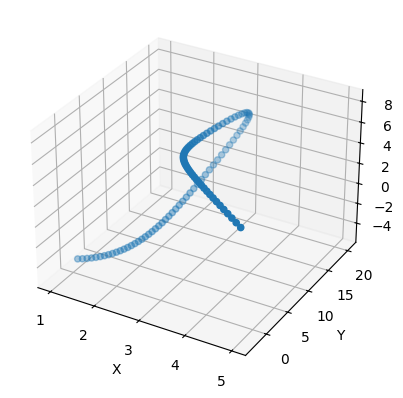

In [ ]:
# 3D plots

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1,x2,x3)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

Text(0, 0.5, 'x value ')

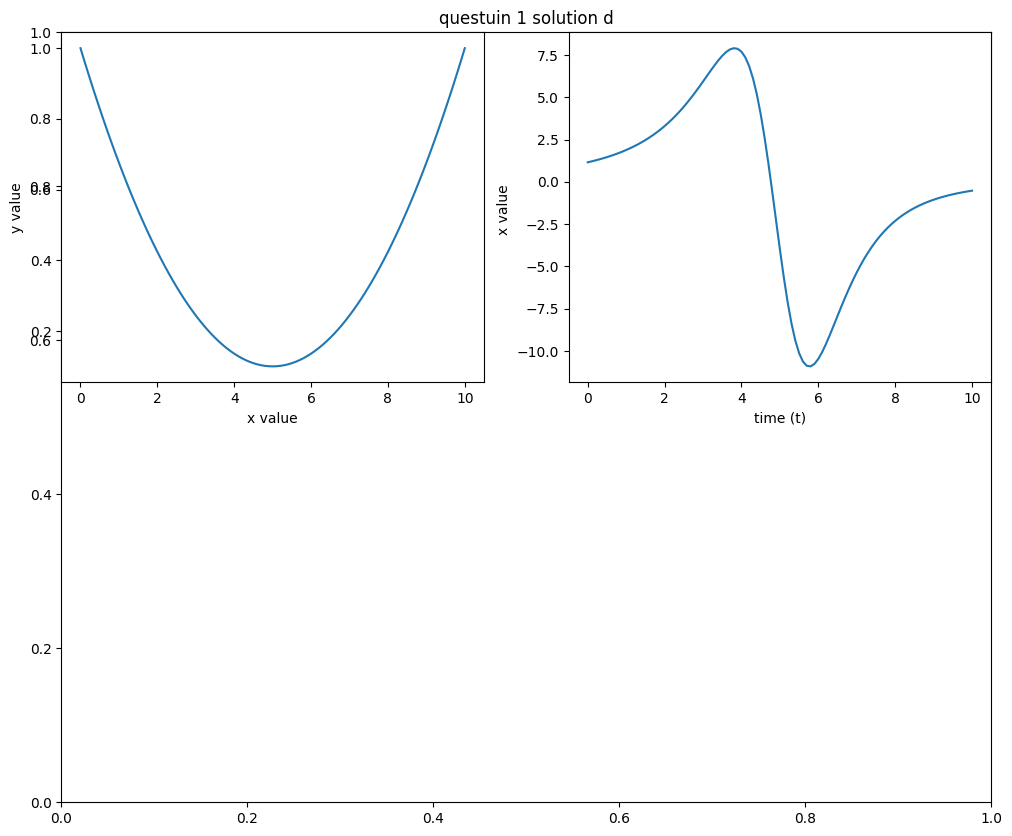

In [ ]:
# Ploting the Graph

plt.figure(figsize=(12,10))
plt.title("questuin 1 solution d")
plt.subplot(2,2,1)

# Graph of x vs y
plt.plot(t,u1)
plt.xlabel("x value")
plt.ylabel("y value")

# Graph of x vs t
plt.subplot(2,2,2)
plt.plot(t,u2)
plt.xlabel("time (t)")
plt.ylabel("x value ")

